Matches Data Sample:
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sun

<ipython-input-2-542d6d4ea8c6>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_wins, x='Team', y='Wins', palette='coolwarm')


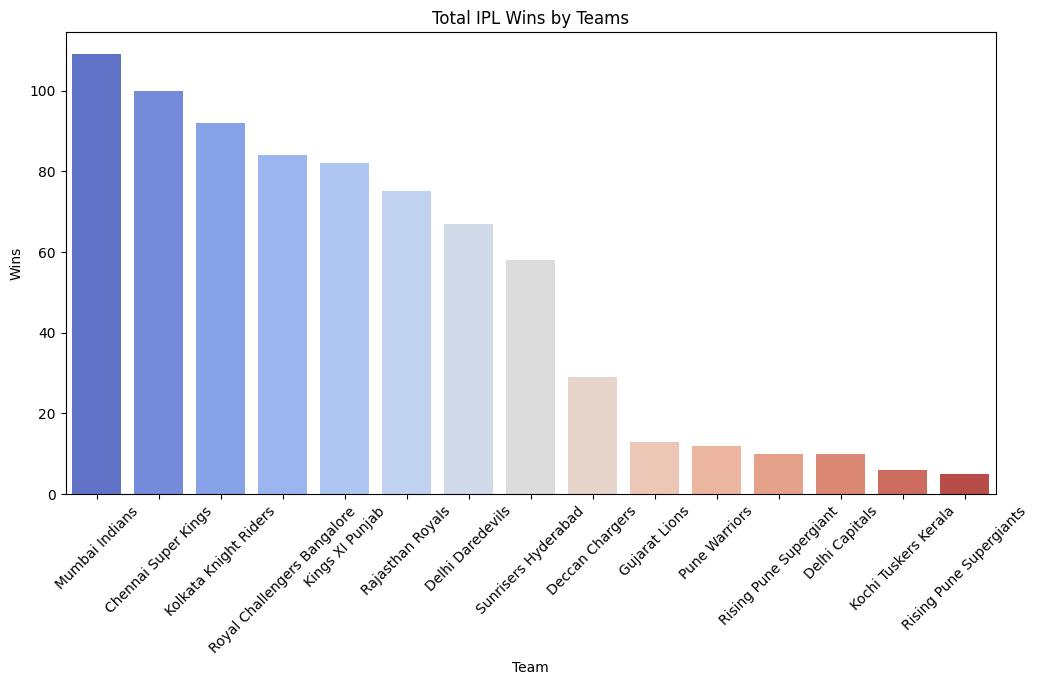

<ipython-input-2-542d6d4ea8c6>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pom.values, y=pom.index, palette='viridis')


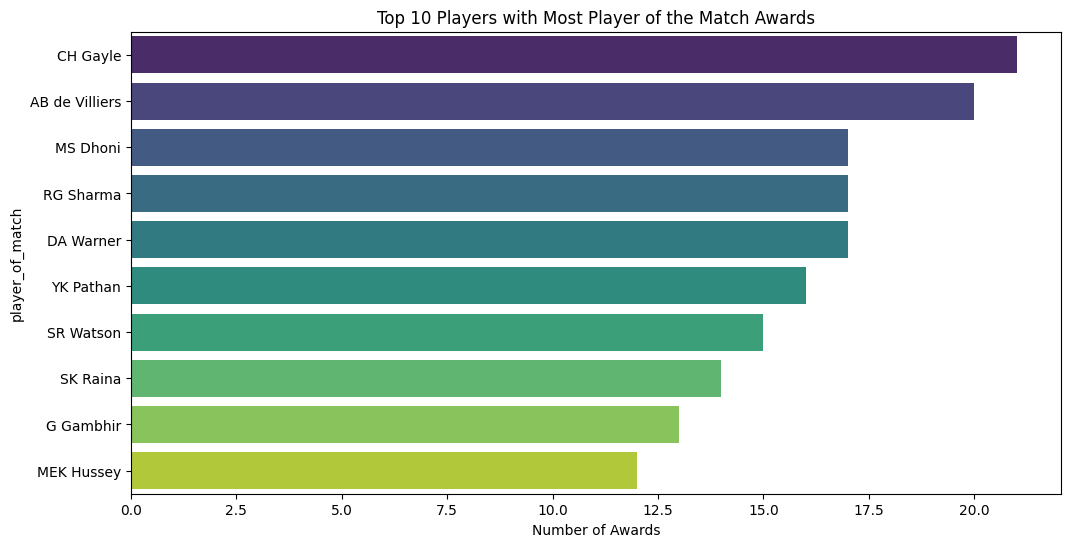

Toss winner won the match 51.98% of the time.


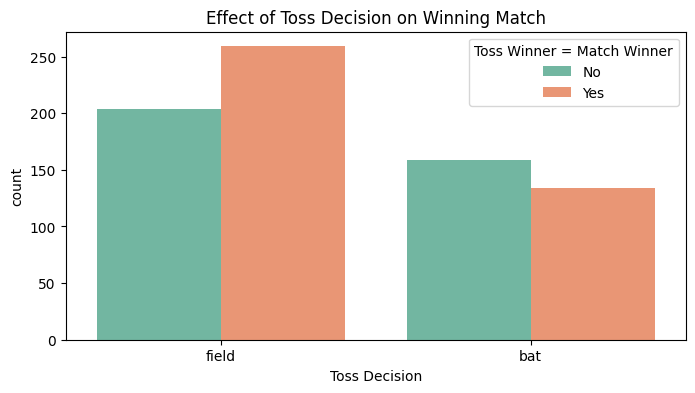

<ipython-input-2-542d6d4ea8c6>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='magma')


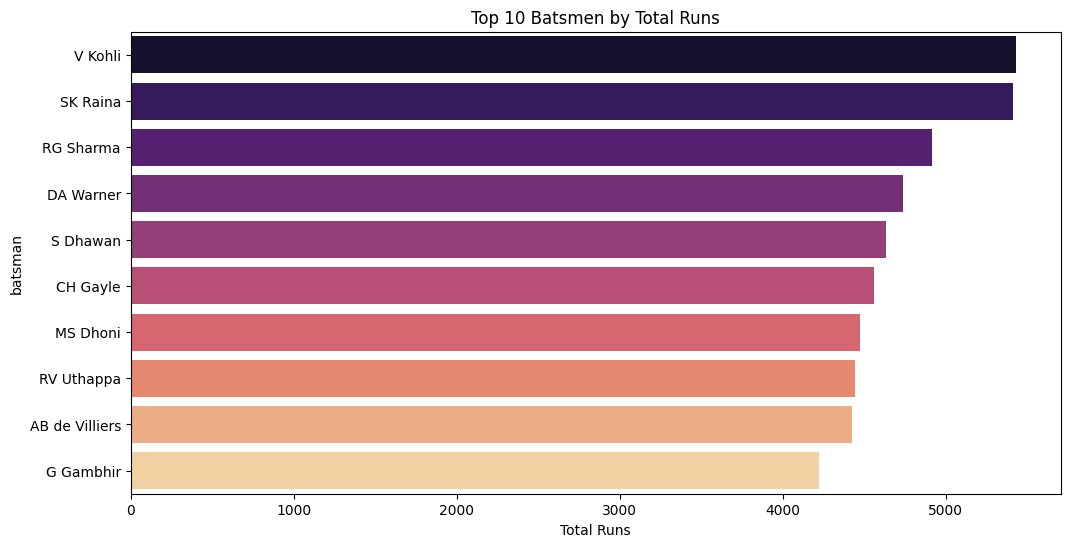

<ipython-input-2-542d6d4ea8c6>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='cool')


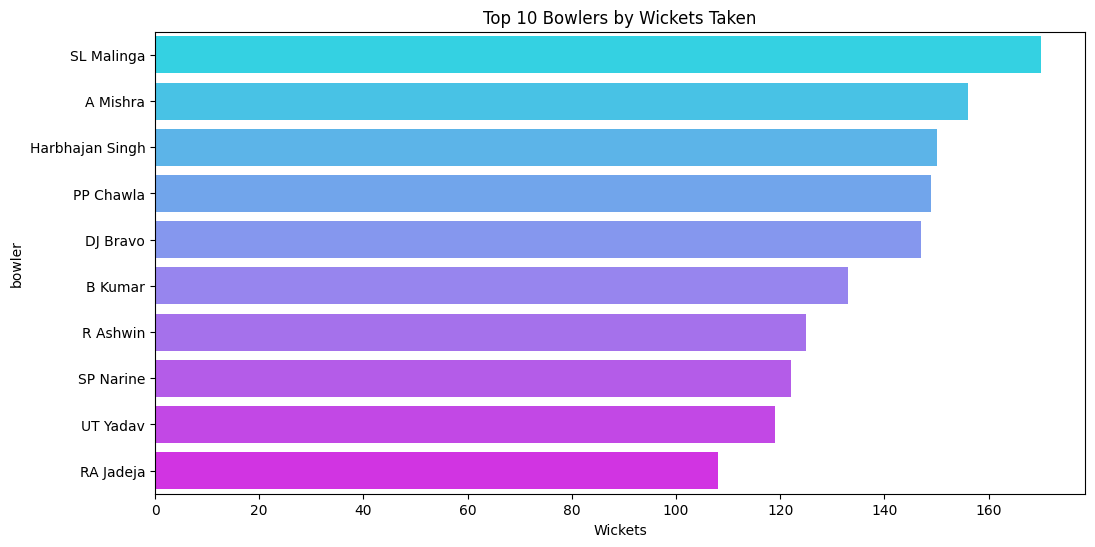


Top Players Recommended for Endorsements:
                Player_of_Match_Awards  Total_Runs   Score
CH Gayle                          21.0      4560.0  46.560
AB de Villiers                    20.0      4428.0  44.428
RG Sharma                         17.0      4914.0  38.914
DA Warner                         17.0      4741.0  38.741
MS Dhoni                          17.0      4477.0  38.477
SK Raina                          14.0      5415.0  33.415
YK Pathan                         16.0         0.0  32.000
G Gambhir                         13.0      4223.0  30.223
SR Watson                         15.0         0.0  30.000
MEK Hussey                        12.0         0.0  24.000


In [ ]:
# Install packages silently
!pip install pandas matplotlib seaborn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

# Quick peek
print("Matches Data Sample:")
print(matches.head())
print("\nDeliveries Data Sample:")
print(deliveries.head())

# --- 1. Most Successful Teams (Based on Matches Won) ---
team_wins = matches['winner'].value_counts().reset_index()
team_wins.columns = ['Team', 'Wins']

plt.figure(figsize=(12,6))
sns.barplot(data=team_wins, x='Team', y='Wins', palette='coolwarm')
plt.title("Total IPL Wins by Teams")
plt.xticks(rotation=45)
plt.show()

# --- 2. Top Performing Players -- Player of the Match Awards ---
pom = matches['player_of_match'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=pom.values, y=pom.index, palette='viridis')
plt.title("Top 10 Players with Most Player of the Match Awards")
plt.xlabel("Number of Awards")
plt.show()

# --- 3. Factors Contributing to Wins: Toss Decision vs Match Result ---
# How often does toss winner win the match?
matches['toss_winner_won'] = matches['toss_winner'] == matches['winner']
toss_win_rate = matches['toss_winner_won'].mean() * 100
print(f"Toss winner won the match {toss_win_rate:.2f}% of the time.")

plt.figure(figsize=(8,4))
sns.countplot(data=matches, x='toss_decision', hue='toss_winner_won', palette='Set2')
plt.title("Effect of Toss Decision on Winning Match")
plt.xlabel("Toss Decision")
plt.legend(title='Toss Winner = Match Winner', labels=['No', 'Yes'])
plt.show()

# --- 4. Top Batsmen by Runs ---
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='magma')
plt.title("Top 10 Batsmen by Total Runs")
plt.xlabel("Total Runs")
plt.show()

# --- 5. Top Bowlers by Wickets (excluding wide, no-ball extras) ---
# Count wickets excluding extras like run outs etc.
valid_wickets = deliveries[(deliveries['dismissal_kind'].notnull()) &
                          (deliveries['dismissal_kind'] != 'run out')]

top_bowlers = valid_wickets['bowler'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='cool')
plt.title("Top 10 Bowlers by Wickets Taken")
plt.xlabel("Wickets")
plt.show()

# --- 6. Endorsement Recommendations (Top players by Player of the Match awards & Runs) ---
top_endorsements = pd.DataFrame({
    'Player_of_Match_Awards': pom,
    'Total_Runs': top_batsmen
}).fillna(0)

top_endorsements['Score'] = top_endorsements['Player_of_Match_Awards']*2 + top_endorsements['Total_Runs']/1000
top_endorsements = top_endorsements.sort_values(by='Score', ascending=False).head(10)

print("\nTop Players Recommended for Endorsements:")
print(top_endorsements)

